In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip /content/drive/MyDrive/Cotton_project/final/final_data.zip -d /content/final_data

# import os
# import zipfile
# import numpy as np
# from sklearn.model_selection import train_test_split
# import cv2
# import tensorflow as tf
# import tensorflow.keras.layers as L
# import matplotlib.pyplot as plt
# from tensorflow.keras.models import Model
# from sklearn.model_selection import train_test_split

# def load_images(directory_path, resize_shape=(128, 128)):
#     image_list = []
#     files = sorted(os.listdir(directory_path))

#     for file in files:
#         img_path = os.path.join(directory_path, file)
#         img = cv2.imread(img_path)
#         img = cv2.resize(img, resize_shape)
#         image_list.append(img)

#     return np.array(image_list)

# # Loading original images and masks
# image_folder = '/content/final_data/final_data/images'
# mask_folder = '/content/final_data/final_data/mask'

# images = load_images(image_folder)
# masks = load_images(mask_folder)


# def convert_to_binary(masks):
#     binary_masks = []
#     for mask in masks:
#         gray_mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
#         _, binary_mask = cv2.threshold(gray_mask, 127, 255, cv2.THRESH_BINARY)
#         binary_masks.append(binary_mask)
#     return np.array(binary_masks)

# masks = convert_to_binary(masks)

# # Spliting data into training and testing sets (80% training, 20% testing)
# src_images, src_test_images, tar_images, tar_test_images = train_test_split(images, masks, test_size=0.2, random_state=42)

# print(f'Training images: {len(src_images)}, Testing images: {len(src_test_images)}')

# import matplotlib.pyplot as plt

# def check_if_grayscale(images, idx=0):
#     """
#     Check if a single image (by index) is grayscale or RGB.
#    """

#     img = images[idx]

#     print(f"Image {idx} shape: {img.shape}")

#     # Checking if the image has 3 channels (RGB)
#     if len(img.shape) == 3 and img.shape[2] == 3:
#         print(f"Image {idx} is RGB.")
#     else:
#         print(f"Image {idx} is Grayscale.")


#     plt.imshow(img, cmap='gray' if len(img.shape) == 2 or img.shape[2] == 1 else None)
#     plt.title(f"Image {idx}")
#     plt.axis('off')
#     plt.show()

# # Checking  1 image from the training images (src_images)
# print("Checking 1 image from the training images (src_images):")
# check_if_grayscale(src_images, idx=2)

# # Checking  1 mask from the training masks (tar_images)
# print("Checking 1 mask from the training masks (tar_images):")
# check_if_grayscale(tar_images, idx=2)


# import numpy as np
# import cv2

# def normalize_grayscale_masks(tar_images):
#     """
#     Normalize both grayscale and RGB masks to binary (0 and 1).
#     This function handles both grayscale and RGB images.
#     """
#     binary_tar_images = []

#     for image in tar_images:

#         if len(image.shape) == 3 and image.shape[2] == 3:
#             gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#         else:
#             gray_image = image


#         _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)


#         binary_image = binary_image / 255.0


#         binary_image = np.expand_dims(binary_image, axis=-1)


#         binary_tar_images.append(binary_image)

#     return np.array(binary_tar_images)

# # Normalizing training masks
# tar_images = normalize_grayscale_masks(tar_images)

# # Normalizing testing masks
# tar_test_images = normalize_grayscale_masks(tar_test_images)

Streaming output truncated to the last 5000 lines.
  inflating: /content/final_data/final_data/images/20221109_lbk_p4r_twri_mosaic3292.jpg  
  inflating: /content/final_data/__MACOSX/final_data/images/._20221109_lbk_p4r_twri_mosaic3292.jpg  
  inflating: /content/final_data/final_data/images/20221109_lbk_p4r_twri_mosaic2832.jpg  
  inflating: /content/final_data/__MACOSX/final_data/images/._20221109_lbk_p4r_twri_mosaic2832.jpg  
  inflating: /content/final_data/final_data/images/20221109_lbk_p4r_twri_mosaic5813.jpg  
  inflating: /content/final_data/__MACOSX/final_data/images/._20221109_lbk_p4r_twri_mosaic5813.jpg  
  inflating: /content/final_data/final_data/images/20221109_lbk_p4r_twri_mosaic5152.jpg  
  inflating: /content/final_data/__MACOSX/final_data/images/._20221109_lbk_p4r_twri_mosaic5152.jpg  
  inflating: /content/final_data/final_data/images/20221109_lbk_p4r_twri_mosaic1452.jpg  
  inflating: /content/final_data/__MACOSX/final_data/images/._20221109_lbk_p4r_twri_mosaic1452.

## Fine-tune YOLO11 on Cotton dataset

In [ ]:
import tensorflow as tf
devices = tf.config.list_physical_devices()
print("\nDevices: ", devices)

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  details = tf.config.experimental.get_device_details(gpus[0])
  print("GPU details: ", details)


Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU details:  {'compute_capability': (7, 5), 'device_name': 'Tesla T4'}


In [ ]:
!pip install ultralytics --quiet

import ultralytics
ultralytics.checks()

Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="kl6c2GutsySaHJPmdmHS")
project = rf.workspace("capstoneproject-lexpd").project("cotton_yield_prediction")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cotton_yield_prediction-1 in yolov11:: 100%|██████████| 3004/3004 [00:00<00:00, 5599.99it/s]


In [ ]:
cd ..

/content


In [ ]:
pwd

'/content'

In [ ]:
dataset.location

'/content/datasets/cotton_yield_prediction-1'

In [ ]:
from ultralytics import YOLO
model = YOLO('yolo11l-seg.pt')

100%|██████████| 53.5M/53.5M [00:00<00:00, 308MB/s]


In [ ]:
!yolo task=detect mode=train model=yolo11s-seg.pt data={dataset.location}/data.yaml epochs=100 imgsz=512 batch=24 save=True plots=True

100% 19.7M/19.7M [00:00<00:00, 62.6MB/s]
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=/content/datasets/cotton_yield_prediction-1/data.yaml, epochs=100, time=None, patience=100, batch=24, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualiz

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					    MaskF1_curve.png	 train_batch3961.jpg
BoxF1_curve.png					    MaskP_curve.png	 train_batch3962.jpg
BoxP_curve.png					    MaskPR_curve.png	 val_batch0_labels.jpg
BoxPR_curve.png					    MaskR_curve.png	 val_batch0_pred.jpg
BoxR_curve.png					    results.csv		 val_batch1_labels.jpg
confusion_matrix_normalized.png			    results.png		 val_batch1_pred.jpg
confusion_matrix.png				    train_batch0.jpg	 val_batch2_labels.jpg
events.out.tfevents.1729471075.f18c544dda21.2225.0  train_batch1.jpg	 val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch2.jpg	 weights
labels.jpg					    train_batch3960.jpg


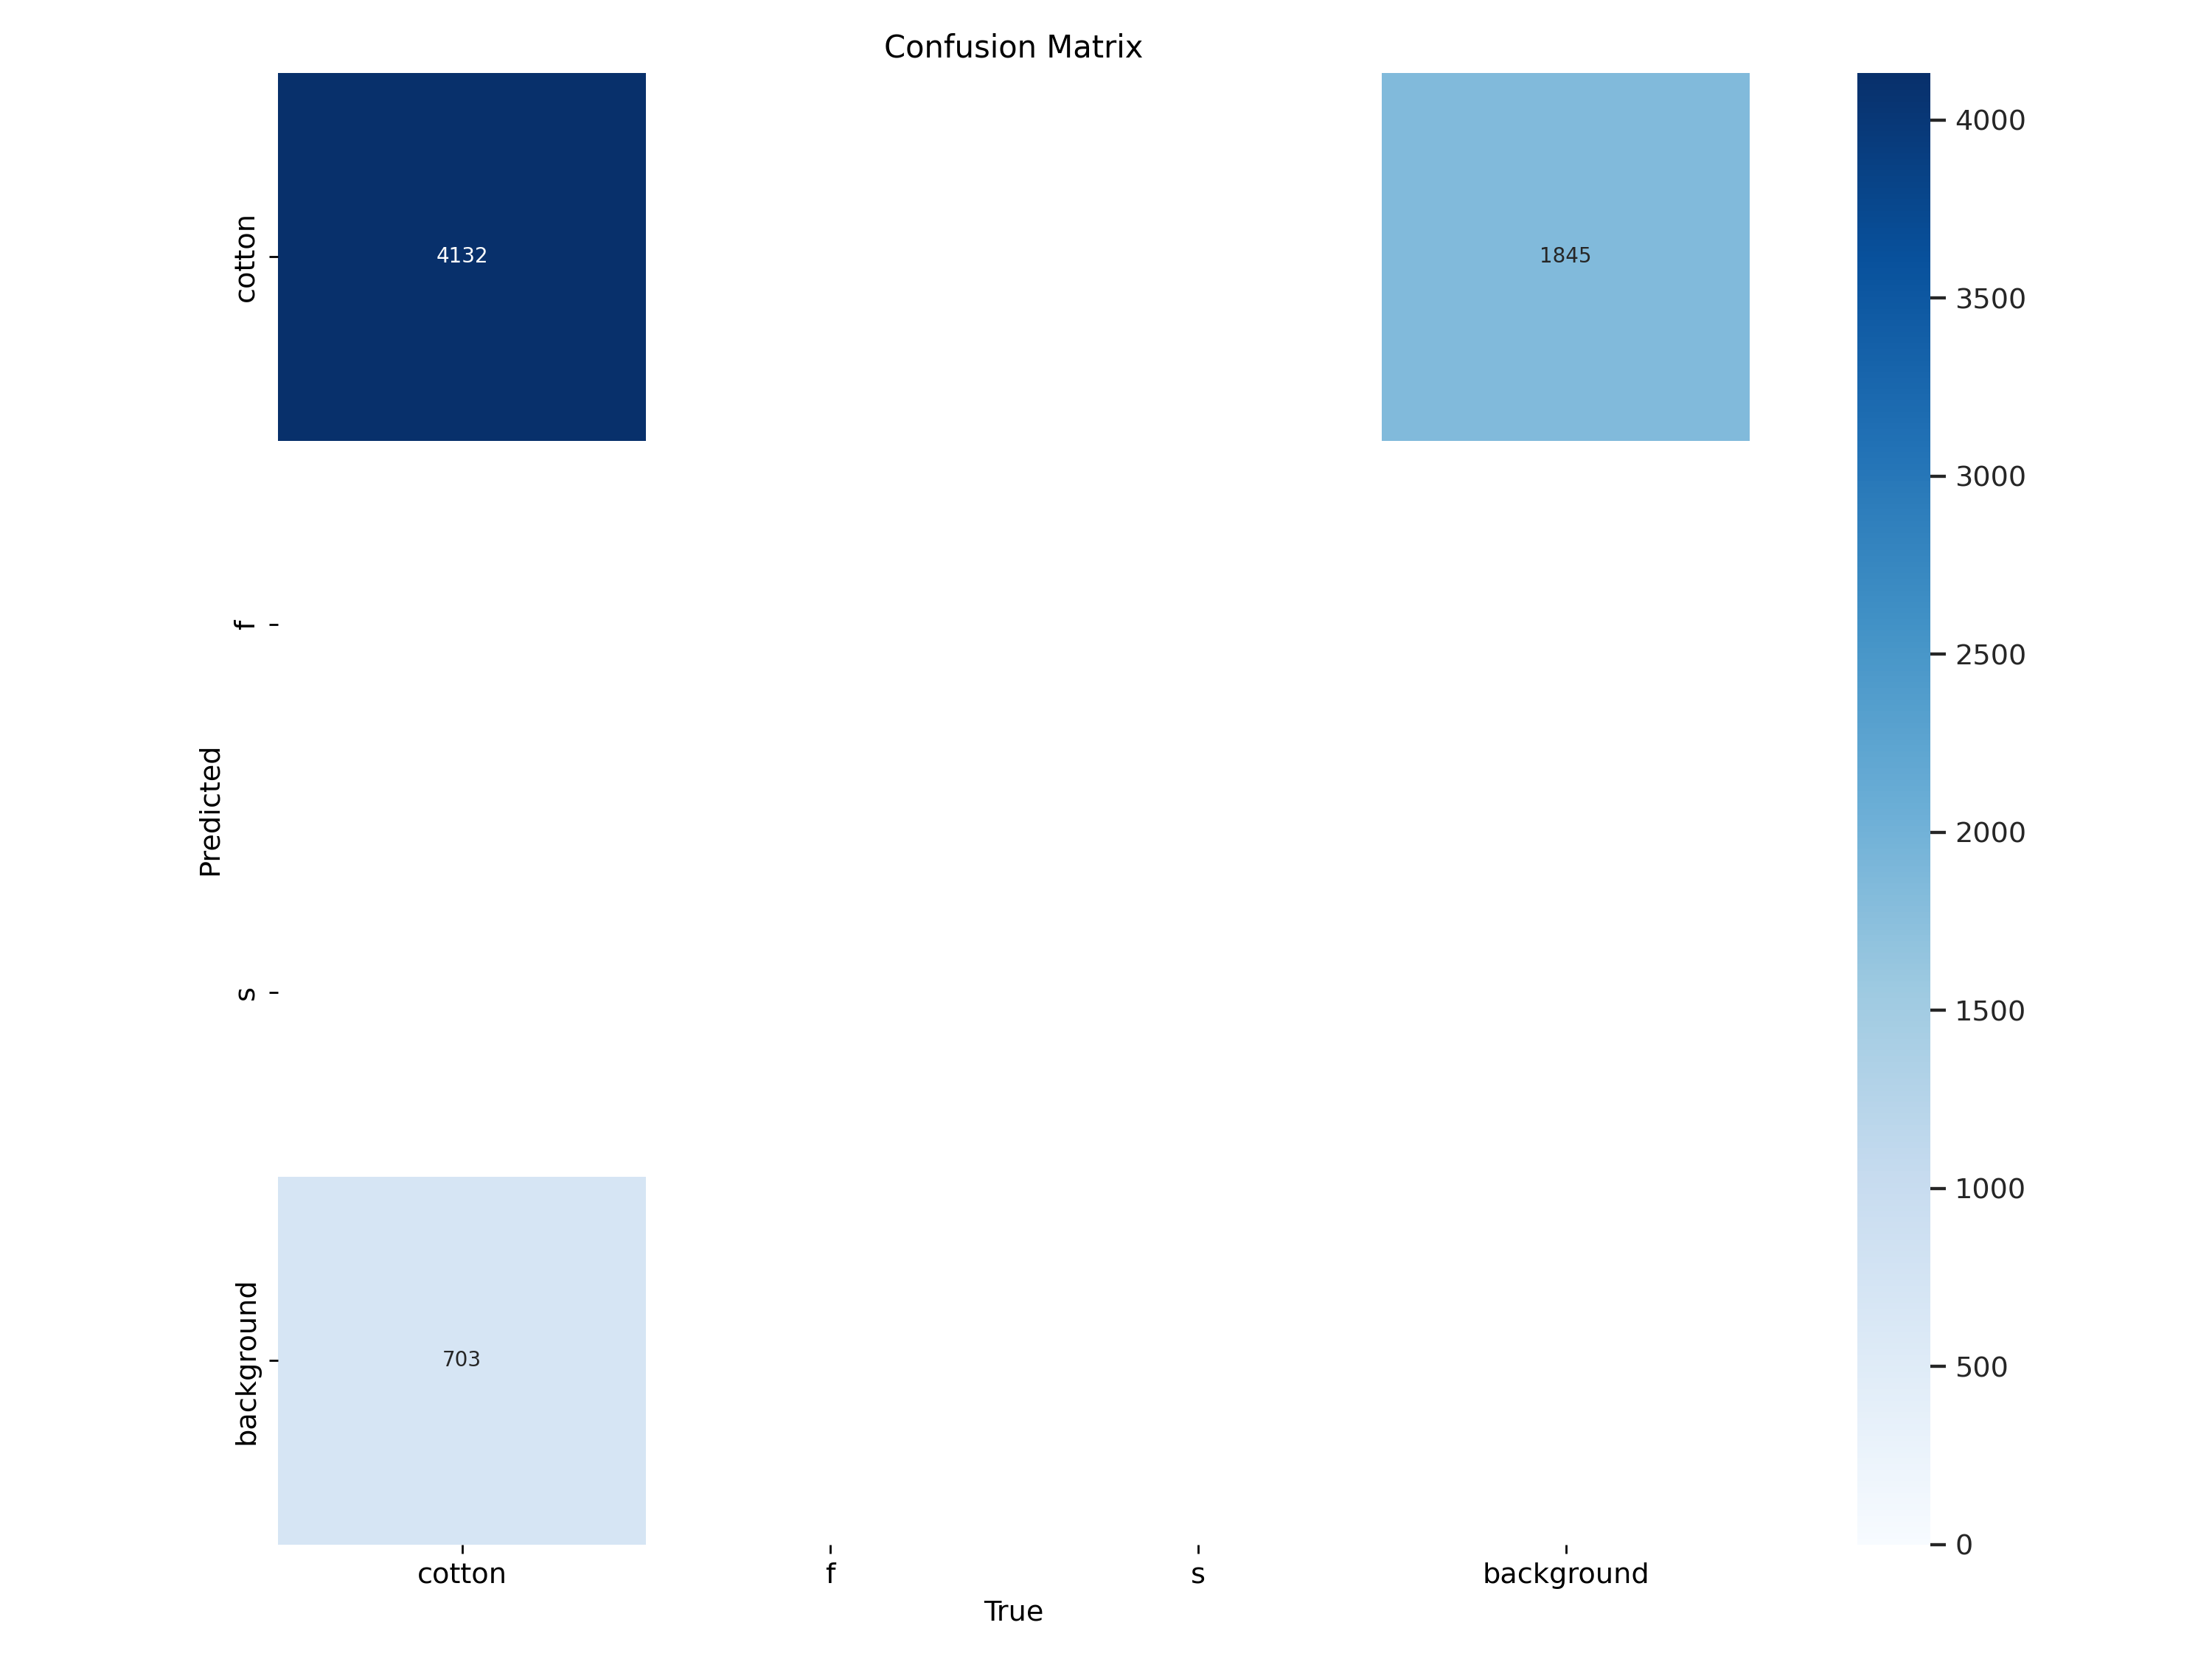

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

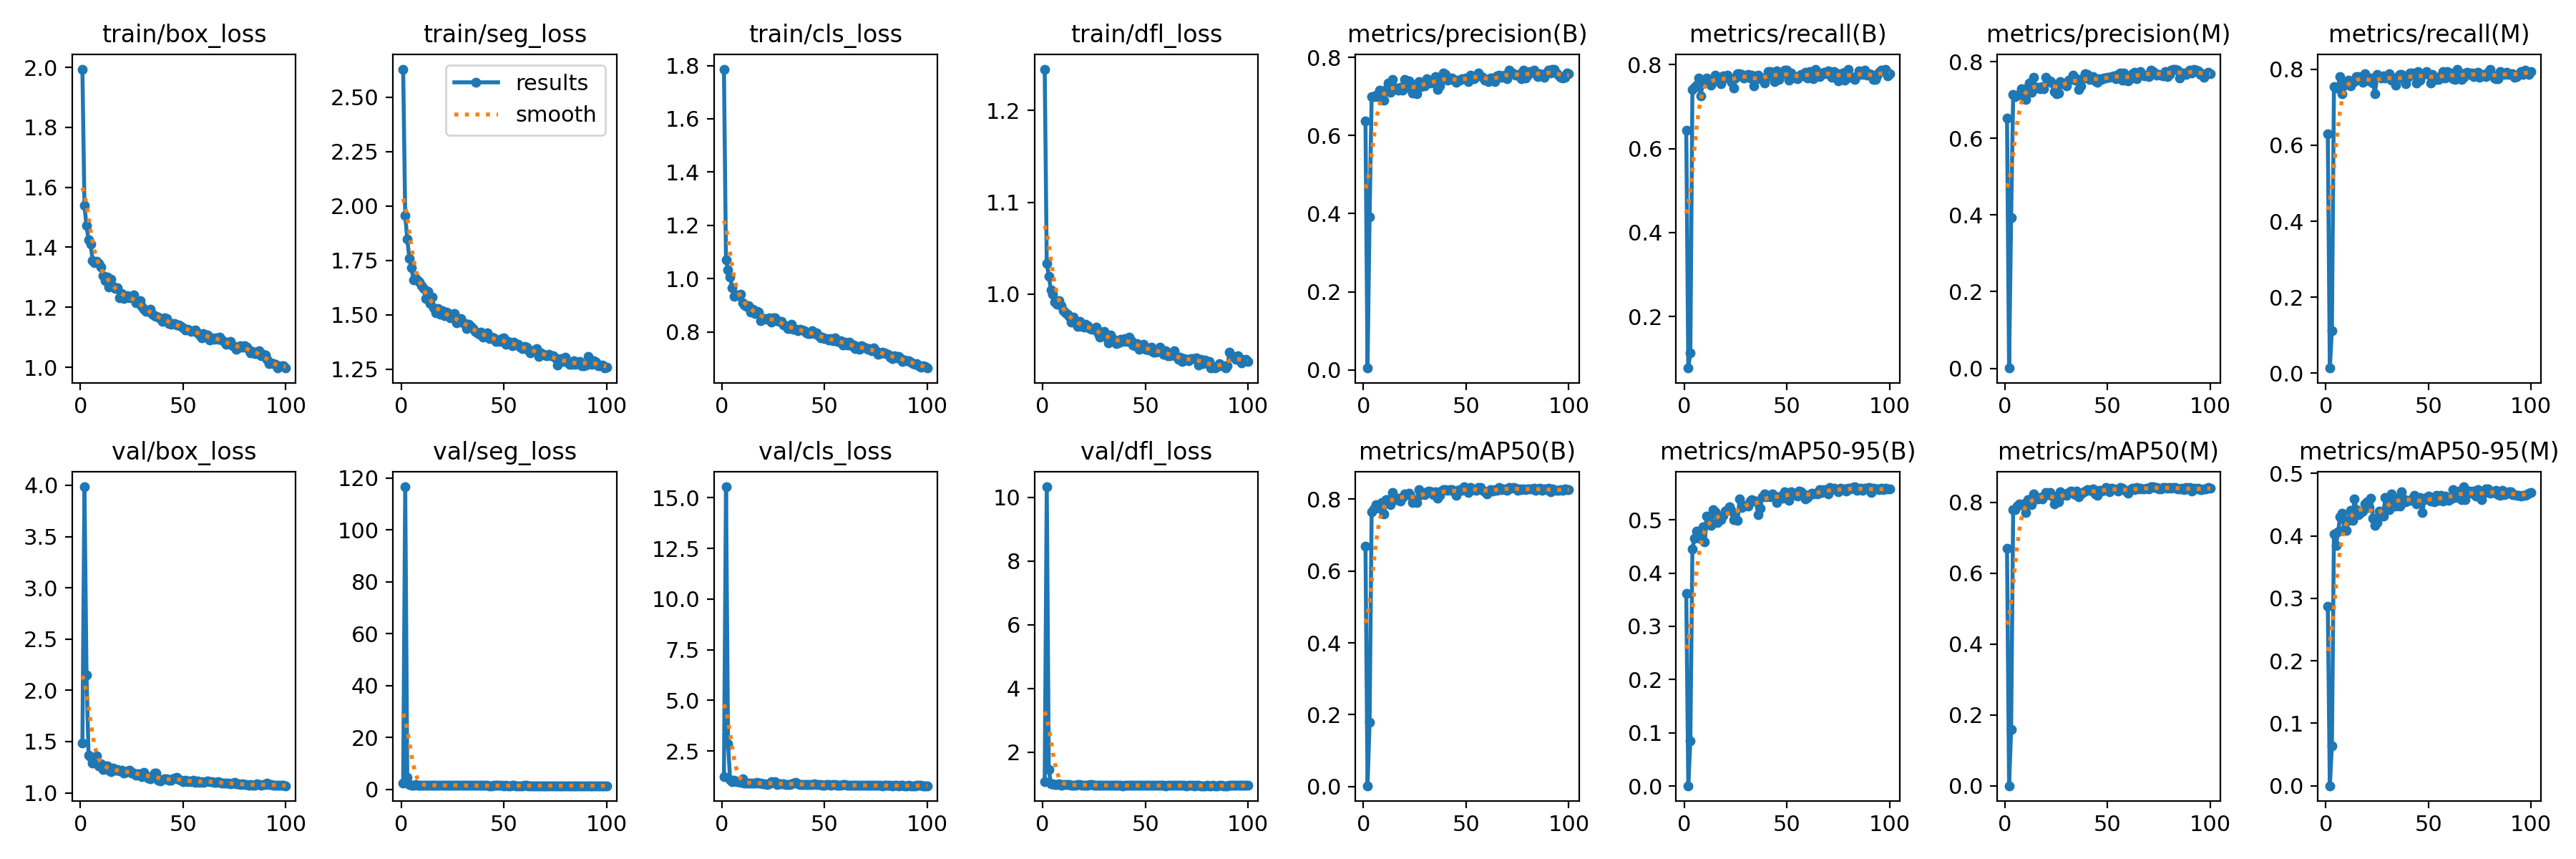

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,977 parameters, 0 gradients, 35.3 GFLOPs
val: Scanning /content/datasets/cotton_yield_prediction-1/valid/labels.cache... 300 images, 0 backgrounds, 0 corrupt: 100% 300/300 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 19/19 [00:12<00:00,  1.49it/s]
                   all        300       4835      0.767      0.764       0.83      0.563      0.779      0.774      0.841      0.464
                cotton        300       4835      0.767      0.764       0.83      0.563      0.779      0.774      0.841      0.464
Speed: 1.3ms preprocess, 8.8ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/

In [ ]:
# !yolo task=detect mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

In [ ]:
# import glob
# import os
# from IPython.display import Image as IPyImage, display

# latest_folder = max(glob.glob(f'{HOME}/runs/segment/predict*/'), key=os.path.getmtime)
# for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
#     display(IPyImage(filename=img, width=600))
#     print("\n")

In [ ]:
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt source={dataset.location}/test/images conf=0.25 save=True save_txt = True

Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,977 parameters, 0 gradients, 35.3 GFLOPs

image 1/150 /content/datasets/cotton_yield_prediction-1/test/images/20221109_lbk_p4r_twri_mosaic1003_jpg.rf.c8cfda85e0cf3e2d5d1a0a3abe65e1f7.jpg: 512x512 21 cottons, 16.2ms
image 2/150 /content/datasets/cotton_yield_prediction-1/test/images/20221109_lbk_p4r_twri_mosaic1041_jpg.rf.4940c013026d85851771bdbbacb4e9e1.jpg: 512x512 21 cottons, 14.5ms
image 3/150 /content/datasets/cotton_yield_prediction-1/test/images/20221109_lbk_p4r_twri_mosaic1094_jpg.rf.5b886f69f33a6e0135cb22ed0e325f4a.jpg: 512x512 18 cottons, 14.4ms
image 4/150 /content/datasets/cotton_yield_prediction-1/test/images/20221109_lbk_p4r_twri_mosaic1108_jpg.rf.c7ed3d1aea621958e30cc1468bc5fc8c.jpg: 512x512 14 cottons, 14.4ms
image 5/150 /content/datasets/cotton_yield_prediction-1/test/images/20221109_lbk_p4r_twri_mosaic1112_jpg.rf.5a114f116e0b281da2d7ef1db716

In [ ]:
import os
import numpy as np
import cv2

# def create_mask_from_polygon(image_size, polygon):
#     """
#     Create a binary mask from polygon points.
#     image_size: (width, height) of the image
#     polygon: list of x, y pairs representing polygon vertices
#     """
#     mask = np.zeros(image_size, dtype=np.uint8)
#     polygon = np.array(polygon, np.int32).reshape((-1, 2))  # Reshape polygon to Nx2 format
#     cv2.fillPoly(mask, [polygon], 1)
#     return mask

def create_mask_from_polygon(image_size, polygon):
    mask = np.zeros(image_size, dtype=np.uint8)

    scaled_polygon = [(int(polygon[i] * image_size[1]), int(polygon[i + 1] * image_size[0])) for i in range(0, len(polygon), 2)]

    if len(scaled_polygon) > 0:
        polygon_np = np.array(scaled_polygon, np.int32).reshape((-1, 2))  # Reshape polygon to Nx2 format
        cv2.fillPoly(mask, [polygon_np], 1)

    return mask

def calculate_iou(mask_pred, mask_true):
    """
    Calculate Intersection over Union (IoU) between two masks.
    """
    intersection = np.logical_and(mask_pred, mask_true).sum()
    union = np.logical_or(mask_pred, mask_true).sum()
    if union == 0:
        return 0
    iou = intersection / union
    return iou

test_images_folder = '/content/datasets/cotton_yield_prediction-1/test/images'  # Path to test images
true_labels_folder = '/content/datasets/cotton_yield_prediction-1/test/labels' # Path to true labels (polygon format)
pred_labels_folder = '/content/runs/segment/predict7/labels'  # Path to predicted labels (polygon format)

iou_scores = []

image_size = (512, 512)

for image_file in os.listdir(test_images_folder):
    true_label_file = os.path.join(true_labels_folder, image_file.replace(".jpg", ".txt"))
    pred_label_file = os.path.join(pred_labels_folder, image_file.replace(".jpg", ".txt"))

    true_polygons = []
    with open(true_label_file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            class_id = int(parts[0])  # Assuming class_id is the first value
            polygon = list(map(float, parts[1:]))  # All the subsequent values are polygon points
            true_polygons.append(polygon)

    pred_polygons = []
    with open(pred_label_file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            class_id = int(parts[0])  # Assuming class_id is the first value
            polygon = list(map(float, parts[1:]))  # All the subsequent values are polygon points
            pred_polygons.append(polygon)

    true_mask = np.zeros(image_size, dtype=np.uint8)
    pred_mask = np.zeros(image_size, dtype=np.uint8)

    for true_polygon in true_polygons:
        true_mask += create_mask_from_polygon(image_size, true_polygon)
    for pred_polygon in pred_polygons:
        pred_mask += create_mask_from_polygon(image_size, pred_polygon)

    iou = calculate_iou(pred_mask, true_mask)
    iou_scores.append(iou)
    print(f"IoU for {image_file}: {iou}")

mean_iou = np.mean(iou_scores)
print(f"Mean IoU: {mean_iou}")

IoU for 20221109_lbk_p4r_twri_mosaic5890_jpg.rf.9c8ed6fa2e263356450372349a5a195b.jpg: 0.6389894809449905
IoU for 20221109_lbk_p4r_twri_mosaic4491_jpg.rf.bdff0a52a61bab1ea6a7a082b1d02db2.jpg: 0.5319694777003026
IoU for 20221109_lbk_p4r_twri_mosaic1443_jpg.rf.0ed72fbc33c72913a47b65bbda420750.jpg: 0.5418329637841833
IoU for 20221109_lbk_p4r_twri_mosaic5041_jpg.rf.90dcb4b9934ab04601bfaf05533decb0.jpg: 0.7356606165548375
IoU for 20221109_lbk_p4r_twri_mosaic759_jpg.rf.9d7f0184acda22014f75c13115d3cd23.jpg: 0.5890257558790594
IoU for 20221109_lbk_p4r_twri_mosaic2542_jpg.rf.317d91b3d66ac7cfedcdc9abc9ad1867.jpg: 0.6100160760466904
IoU for 20221109_lbk_p4r_twri_mosaic3592_jpg.rf.cd9c6faa7fca628b4f60c138ab822c38.jpg: 0.5268652358008469
IoU for 20221109_lbk_p4r_twri_mosaic778_jpg.rf.1126e2753ba3e46281960f69ffcd107a.jpg: 0.6080303243015583
IoU for 20221109_lbk_p4r_twri_mosaic2721_jpg.rf.53c6eb0c442c59a6a94c8e4cb6f735d4.jpg: 0.6521000849023623
IoU for 20221109_lbk_p4r_twri_mosaic3156_jpg.rf.3d68ec212

True polygon for 20221109_lbk_p4r_twri_mosaic1094_jpg.rf.5b886f69f33a6e0135cb22ed0e325f4a.jpg: [[0.46, 0.03355704697986577, 0.4666666666666667, 0.040268456375838924, 0.4866666666666667, 0.040268456375838924, 0.49333333333333335, 0.03355704697986577, 0.5, 0.03355704697986577, 0.5, 0.026845637583892617, 0.5066666666666667, 0.020134228187919462, 0.5066666666666667, 0.013422818791946308, 0.4666666666666667, 0.013422818791946308, 0.46, 0.020134228187919462], [0.5333333333333333, 0.087248322147651, 0.5266666666666666, 0.09395973154362416, 0.5266666666666666, 0.10738255033557047, 0.5133333333333333, 0.12080536912751678, 0.5133333333333333, 0.12751677852348994, 0.52, 0.1342281879194631, 0.52, 0.14093959731543623, 0.56, 0.14093959731543623, 0.5666666666666667, 0.1342281879194631, 0.5666666666666667, 0.12080536912751678, 0.5733333333333334, 0.11409395973154363, 0.5733333333333334, 0.09395973154362416, 0.5666666666666667, 0.09395973154362416, 0.56, 0.087248322147651], [0.6333333333333333, 0.07382

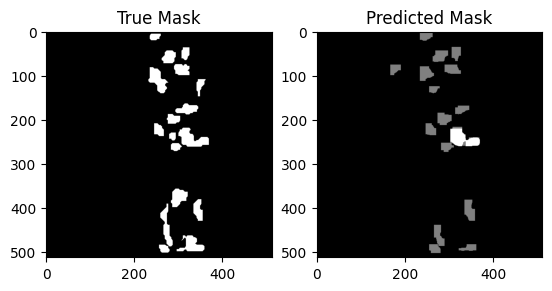

In [ ]:
print(f"True polygon for {image_file}: {true_polygons}")
print(f"Predicted polygon for {image_file}: {pred_polygons}")

true_mask = np.zeros(image_size, dtype=np.uint8)
pred_mask = np.zeros(image_size, dtype=np.uint8)

for true_polygon in true_polygons:
    true_mask += create_mask_from_polygon(image_size, true_polygon)
for pred_polygon in pred_polygons:
    pred_mask += create_mask_from_polygon(image_size, pred_polygon)

if np.array_equal(true_mask, pred_mask):
    print(f"Masks are identical for {image_file}")

plt.subplot(1, 2, 1)
plt.imshow(true_mask, cmap='gray')
plt.title('True Mask')
plt.subplot(1, 2, 2)
plt.imshow(pred_mask, cmap='gray')
plt.title('Predicted Mask')
plt.show()